# Trabajo Práctico 1: Análisis Exploratorio de Datos #
## Cientes potenciales a tarjetas de crédito. ##
El [DATASET](https://www.kaggle.com/datasets/sajidhussain3/jobathon-may-2021-credit-card-lead-prediction?select=train.csv) contiene información de clientes de un banco denominado Happy Customer Bank. Es un banco privado de tamaño medio que se ocupa de todo tipo de productos bancarios, como cuentas de ahorro, cuentas corrientes, productos de inversión, productos de crédito, entre otras ofertas.  

En este caso, el Happy Customer Bank desea realizar ventas cruzadas de sus tarjetas de crédito a sus clientes existentes. El banco ha identificado un conjunto de clientes que son elegibles para aceptar estas tarjetas de crédito.

El banco tiene la necesidad, de identificar a los clientes que podrían mostrar intención hacia una tarjeta de crédito recomendada.

<img src = "https://storage.googleapis.com/kaggle-datasets-images/1371711/2277422/2c35585d42b3747882e83e926d0f643e/dataset-cover.png?t=2021-05-27-18-40-42">


 --- 

## 1. Listado de variables y selección ###
### a) Variables de Entrada ##

- **ID:** Identificador único para cada fila. (no lo vamos a usar)



- **Gender:** Género del cliente.



- **Age:** Edad del cliente (en años).


        
- **Region_Code:** Código de la Región para los clientes


        
- **Occupation:** Ocupación del cliente.

        
        
- **Channel_Code:** Código de Canal de Adquisición para el Cliente (Codificado)


        
- **Vintage:** Antiguedad del Cliente (En Meses).

        
        
- **Credit_Product:** Si el Cliente tiene algún producto de crédito activo (Préstamo de vivienda, Préstamo personal, Tarjeta de crédito, etc.)



- **Avg_Account_Balance:** Saldo de cuenta promedio. Saldo promedio de la cuenta del cliente en los últimos 12 meses

      
      
- **Is_Active:** Si el cliente está activo en los últimos 3 meses. 
            0-> El cliente no esta activo | 1-> el cliente esta activo
            
            
--------

### b) Variable de Salida ###

- **Is_Lead:**  Si el Cliente está interesado en la Tarjeta de Crédito.
            0-> El cliente no esta interesado | 1-> el cliente esta interesado



In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import keras
import h5py
import PIL
import seaborn as sns
import sklearn
import pytz

from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 0

plt.rcParams.update({
    "font.family": ["serif"],
    "font.sans-serif": ["Roboto"],
    "font.size": 9,
    "axes.labelsize": 11,
    "axes.titlesize": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    'figure.figsize': (15.0, 4.0),
    'axes.grid': False,
    'axes.spines.left': True,
    'axes.spines.right': True,
    'axes.spines.top': True,
    'axes.spines.bottom': True,
})

np.set_printoptions(suppress=True)

#warnings.filterwarnings('ignore')

In [2]:
data_TC = pd.read_csv('train.csv')

BETTER_COLUMN_NAMES = {
    'ID': 'id',
    'Gender': 'sexo',
    'Age': 'edad',
    'Region_Code': 'codigo_region',
    'Occupation': 'ocupacion',
    'Channel_Code': 'codigo_canal',
    'Vintage': 'antiguedad',
    'Credit_Product': 'parents_children',
    'Credit_Product': 'tiene_producto_credito_activo',
    'Avg_Account_Balance': 'saldo_promedio_cuenta',
    'Is_Active': 'es_activo',
    'Is_Lead': 'esta_interesado',
}
data_TC.rename(columns=BETTER_COLUMN_NAMES, inplace=True)

data_TC.set_index('id', inplace=True)

In [3]:
data_TC.sample(10)

,sexo,edad,codigo_region,ocupacion,codigo_canal,antiguedad,tiene_producto_credito_activo,saldo_promedio_cuenta,es_activo,esta_interesado
id,,,,,,,,,,
SQPH5JX4,Male,72,RG268,Other,X2,75,No,1545556,Yes,0
UQ7CVW7T,Male,57,RG268,Other,X2,91,No,2206452,Yes,0
4SUCKCGF,Female,44,RG281,Self_Employed,X3,98,No,723961,Yes,0
DSDE2Z4B,Female,29,RG277,Salaried,X1,15,No,1183886,Yes,0
HTOMAWA3,Male,73,RG282,Other,X2,85,No,923828,No,0
FC44FKJR,Male,31,RG276,Self_Employed,X1,25,NaN,1017955,No,0
BGWWDHPP,Male,26,RG280,Salaried,X1,19,No,345969,No,0
CGB6MC4A,Male,27,RG253,Salaried,X1,33,No,1090641,No,0
H45BBOJ2,Female,29,RG257,Self_Employed,X1,26,No,658582,No,0


### c) Transformaciones ###

In [4]:
# 1. Obtener los nombres de las columas como una lista
col_name = data_TC.columns.tolist()

# 2. Itera sobre la lista de nombres
for column in col_name:
    print ("Valores nulos en <{0}>: {1}".format(column, data_TC[column].isnull().sum()))

Valores nulos en <sexo>: 0
Valores nulos en <edad>: 0
Valores nulos en <codigo_region>: 0
Valores nulos en <ocupacion>: 0
Valores nulos en <codigo_canal>: 0
Valores nulos en <antiguedad>: 0
Valores nulos en <tiene_producto_credito_activo>: 29325
Valores nulos en <saldo_promedio_cuenta>: 0
Valores nulos en <es_activo>: 0
Valores nulos en <esta_interesado>: 0


In [5]:
Nulos = data_TC.isnull().sum()
print("Columnas             Cantidad de nulos")
print(Nulos)

Columnas             Cantidad de nulos
sexo                                 0
edad                                 0
codigo_region                        0
ocupacion                            0
codigo_canal                         0
antiguedad                           0
tiene_producto_credito_activo    29325
saldo_promedio_cuenta                0
es_activo                            0
esta_interesado                      0
dtype: int64


In [6]:
data_TC.count()

sexo                             245725
edad                             245725
codigo_region                    245725
ocupacion                        245725
codigo_canal                     245725
antiguedad                       245725
tiene_producto_credito_activo    216400
saldo_promedio_cuenta            245725
es_activo                        245725
esta_interesado                  245725
dtype: int64

In [11]:
#esto capaz nos convenga hacerlo en el mapper con sklearn
data_TC = data_TC[data_TC['tiene_producto_credito_activo'].notna()]

In [12]:
# Descripción de los datos
data_TC.describe()

,edad,antiguedad,saldo_promedio_cuenta,esta_interesado
count,216400.000000,216400.000000,2.164000e+05,216400.000000
mean,42.807315,44.285522,1.115086e+06,0.153942
std,14.850996,31.235351,8.500172e+05,0.360894
min,23.000000,7.000000,2.079000e+04,0.000000
25%,29.000000,20.000000,5.958438e+05,0.000000
50%,41.000000,31.000000,8.805390e+05,0.000000
75%,53.000000,67.000000,1.346543e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


### Tipo de cada columna

In [13]:

# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
# datos.dtypes
data_TC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216400 entries, NNVBBKZB to BOCZSWLJ
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   sexo                           216400 non-null  object
 1   edad                           216400 non-null  int64 
 2   codigo_region                  216400 non-null  object
 3   ocupacion                      216400 non-null  object
 4   codigo_canal                   216400 non-null  object
 5   antiguedad                     216400 non-null  int64 
 6   tiene_producto_credito_activo  216400 non-null  object
 7   saldo_promedio_cuenta          216400 non-null  int64 
 8   es_activo                      216400 non-null  object
 9   esta_interesado                216400 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.2+ MB


In [14]:
#Primero necesita hacer esto para poder dibujar la matriz de correlaciones
corr_matrix = data_TC.select_dtypes(include=['float64', 'int']).corr(method='pearson')

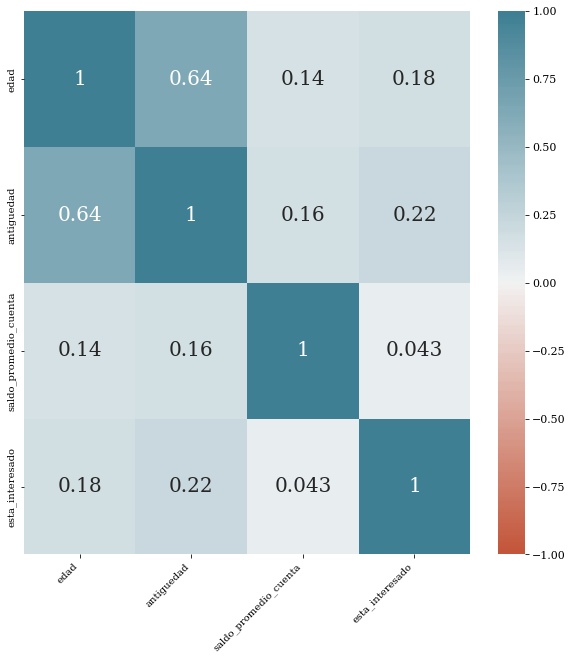

In [23]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10)) # (8, 8) tamaño de la grilla 

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = True, # Barra del costado
    annot_kws = {"size": 20}, # tamaño nro cuadrilla
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200), # (20, 220, n=200) color de la grilla
    square    = False, 
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10) # (labelsize = 50) tamaño la leyenda de los ejes

- **Gender:** one-hot encoder



- **Age:** rango


        
- **Region_Code:** one-hot encoder


        
- **Occupation:** one-hot encoder

        
        
- **Channel_Code:** one-hot encoder


        
- **Vintage:** rango

        
        
- **Credit_Product:** one-hot encoder y eliminamos los null. (esta desbalanceado)



- **Avg_Account_Balance:** escalar y rangos (y ver outliers)

      
      
- **Is_Active:** one-hot encoder

In [ ]:
# Se dividen los datos en train y test
# 60% train, 20% test, 20% validation
train, not_train = train_test_split(data_TC, test_size=0.4)
validation, test = train_test_split(not_train, test_size=0.5)

#Dimención (filas, columnas) de los distintos dataset
print (" Train:", train.shape, '\n', 'Validation:', validation.shape, '\n', 'Test:', test.shape)
#print("first line", "second line", sep="\n")`